# Aufgabe 1
Daten importieren

In [2]:
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import statistics

# Set default Seaborn style
sns.set()

data = pd.read_csv("nobel.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Year                  969 non-null    int64 
 1   Category              969 non-null    object
 2   Prize                 969 non-null    object
 3   Motivation            881 non-null    object
 4   Prize Share           969 non-null    object
 5   Laureate ID           969 non-null    int64 
 6   Laureate Type         969 non-null    object
 7   Full Name             969 non-null    object
 8   Birth Date            940 non-null    object
 9   Birth City            941 non-null    object
 10  Birth Country         943 non-null    object
 11  Sex                   943 non-null    object
 12  Organization Name     722 non-null    object
 13  Organization City     716 non-null    object
 14  Organization Country  716 non-null    object
 15  Death Date            617 non-null    ob

Wer bekommt einen Nobelpreis?

In [3]:
names = data['Full Name']
names

0      Jacobus Henricus van 't Hoff
1                   Sully Prudhomme
2            Emil Adolf von Behring
3                 Jean Henry Dunant
4                    Frédéric Passy
                   ...             
964                Yoshinori Ohsumi
965              Juan Manuel Santos
966               David J. Thouless
967            F. Duncan M. Haldane
968           J. Michael Kosterlitz
Name: Full Name, Length: 969, dtype: object

Geschlecht der Nobelpreisträger?

In [4]:
genders = data['Sex'].value_counts()
genders

Male      893
Female     50
Name: Sex, dtype: int64

Alter der Nobelpreisträger?

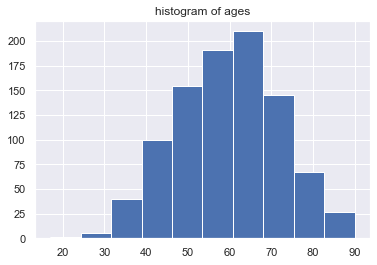

In [5]:
def calculate_age(born, date_of_win):
    return date_of_win.year - born.year # - ((date_of_win.month, date_of_win.day) < (born.month, born.day))

data['DateTime Birthday'] = pd.to_datetime(data['Birth Date'], errors='coerce')

# new column with age of winner
data["Age"] = data.apply(lambda row: calculate_age(row["DateTime Birthday"], dt.datetime(row["Year"], 1, 1)), axis=1)

ages = data['Age']

plt.hist(ages)
plt.title('histogram of ages')
plt.show()

Jüngster Nobelpreisträger

In [6]:
data.iloc[[data['Age'].idxmin()]]

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country,DateTime Birthday,Age
940,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,914,Individual,Malala Yousafzai,1997-07-12,Mingora,Pakistan,Female,NaN,NaN,NaN,NaN,NaN,NaN,1997-07-12,17.0


Ältester Nobelpreisträger

In [7]:
data.iloc[[data['Age'].idxmax()]]

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country,DateTime Birthday,Age
825,2007,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having laid the foundations of mechanism ...",1/3,820,Individual,Leonid Hurwicz,1917-08-21,Moscow,Russia,Male,University of Minnesota,"Minneapolis, MN",United States of America,2008-06-24,"Minneapolis, MN",United States of America,1917-08-21,90.0


Gewinner mit mehr als einem Nobelpreis

People with more than one win with the amount of wins:
{'Jack W. Szostak': 3, 'Comité international de la Croix Rouge (International Committee of the Red Cross)': 3, 'Paul Ehrlich': 2, 'Roderick MacKinnon': 2, 'Albert Fert': 2, 'Adam G. Riess': 2, 'Robert J. Lefkowitz': 2, 'Alvin E. Roth': 2, 'Werner Forssmann': 2, 'Rudolf Ludwig Mössbauer': 2, 'Shinya Yamanaka': 2, 'Serge Haroche': 2, 'John Bardeen': 2, 'David J. Wineland': 2, 'Martin Karplus': 2, 'Mario R. Capecchi': 2, 'Günter Blobel': 2, 'Abdus Salam': 2, 'Randy W. Schekman': 2, 'Saul Perlmutter': 2, 'Osamu Shimomura': 2, 'Walther Bothe': 2, 'Kurt Wüthrich': 2, 'Thomas A. Steitz': 2, 'Charles Kuen Kao': 2, 'Petrus (Peter) Josephus Wilhelmus Debye': 2, 'Toshihide Maskawa': 2, 'Il´ja Mikhailovich Frank': 2, 'Igor Yevgenyevich Tamm': 2, 'Dale T. Mortensen': 2, 'Roger Y. Tsien': 2, 'Richard Kuhn': 2, 'Georges Charpak': 2, 'Frederick Sanger': 2, 'Adolf Friedrich Johann Butenandt': 2, 'William Parry Murphy': 2, 'Bruce A. Beutler': 2, 'Th

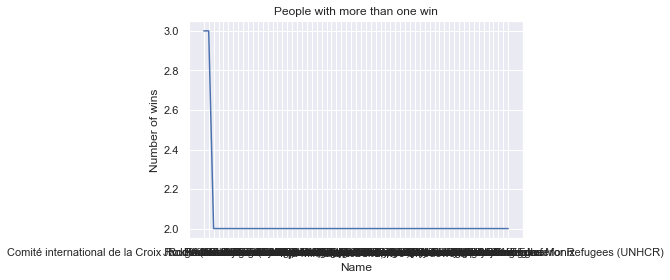

In [8]:
winners_accumulated = names.value_counts()
winners_with_prices_count = winners_accumulated.to_dict()
winners_with_more_than_two = {}
for winner in winners_with_prices_count:
    if winners_with_prices_count[winner] > 1:
        winners_with_more_than_two[winner] = winners_with_prices_count[winner]
print("People with more than one win with the amount of wins:")
print(winners_with_more_than_two)
ls = winners_with_more_than_two.items()
x, y = zip(*ls)
plt.plot(x, y)
plt.xlabel('Name')
plt.ylabel('Number of wins')
plt.title('People with more than one win')
plt.show()


In [9]:
ages = data['Age']

ages_mean = np.mean(ages)

print("Altersdurchschnitt:", ages_mean)
print("Median:", statistics.median(ages))
print("Standardabweichung:", np.std(ages))
print("Varianz:", np.var(ages))

ages.describe()

Altersdurchschnitt: 59.48510638297872
Median: 62.0
Standardabweichung: 12.357820828405815
Varianz: 152.71573562698057


count    940.000000
mean      59.485106
std       12.364399
min       17.000000
25%       50.000000
50%       60.000000
75%       69.000000
max       90.000000
Name: Age, dtype: float64

# Aufgabe 2
1. Nobel Prize Winner: find statistical characteristics for nobel prize age with explanation each of these. Find how many youngest Nobel winners might we expect? Use examples from “TestProject”.

## Verteilungsfunktion

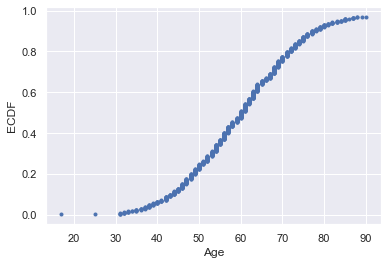

In [10]:
def ecdf(data):
    # number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x=np.sort(data)
    # y-data for the ECDF: y
    y=np.arange(1, n+1)/n
    return x,y

x_age, y_age = ecdf(ages)

plt.plot(x_age, y_age, marker='.', linestyle='none')
plt.ylabel('ECDF')
plt.xlabel('Age')
plt.show()

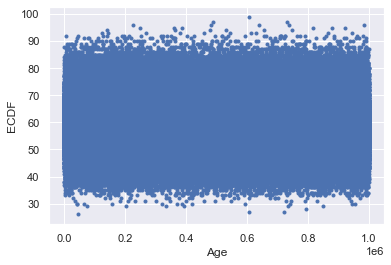

Wahrscheinlichkeit, dass Nobelpreisgewinner < 18 sein wird:
 0.0 %


In [11]:
sample_ages_poisson = np.random.poisson(ages_mean, size=1000000)

p_yougher_than_18 = np.sum(sample_ages_poisson < 18)

plt.plot(sample_ages_poisson, marker='.', linestyle='none')
plt.ylabel('ECDF')
plt.xlabel('Age')
plt.show()

print("Wahrscheinlichkeit, dass Nobelpreisgewinner < 18 sein wird:\n",
      p_yougher_than_18/1000000*100,
      "%")

2. Find Cov. Matrix for Iris Types “setosa” and “Virginica” for
sepal length and sepal width with explanation what each element
of Matrix means and why.

In [13]:
iris_data = pd.read_csv("iris.csv", delimiter=";")

virginica = iris_data[iris_data.target_names =='Iris-virginica']
virginica_sepal_length = virginica.loc[:, 'sepal length (cm)']
virginica_sepal_width = virginica.loc[:, 'sepal width (cm)']

virginica_covariance_matrix = np.cov(virginica_sepal_length, virginica_sepal_width)

setosa = iris_data[iris_data.target_names =='Iris-setosa']
setosa_sepal_length = setosa.loc[:, 'sepal length (cm)']
setosa_sepal_width = setosa.loc[:, 'sepal width (cm)']
# Compute the covariance matrix: covariance_matrix
setosa_covariance_matrix = np.cov(setosa_sepal_length, setosa_sepal_width)

# Print covariance matrix
print("Virginica Covariance Matrix\n", virginica_covariance_matrix)
print("Virginica Setosa Matrix\n", setosa_covariance_matrix)

# Extract covariance of length and width of petals: petal_cov
virginica_cov = virginica_covariance_matrix[0,1]
setosa_cov = setosa_covariance_matrix[0,1]
# Print the length/width covariance
print("Kovarianz Virginica: ", virginica_cov)
print("Kovarianz Setosa: ", setosa_cov)
print("Da die Kovarianz bei beiden Arten < 0.5 ist, besteht zwischen der\nLände und Breite nur ein geringer Zusammenhang")

Virginica Covariance Matrix
 [[0.40434286 0.09376327]
 [0.09376327 0.10400408]]
Virginica Setosa Matrix
 [[0.12424898 0.10029796]
 [0.10029796 0.14517959]]
Kovarianz Virginica:  0.09376326530612242
Kovarianz Setosa:  0.10029795918367344
Da die Kovarianz bei beiden Arten < 0.5 ist, besteht zwischen der
Lände und Breite nur ein geringer Zusammenhang
